<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#f0f0f0;">.....................
    <span style="font-family: Arial; font-weight:bold;font-size:3.2em;color:#8f5704;">SLC EXAM FOR 30 MARKS

-------------

# 4 Questions X 2 Marks = 8 Marks

------------

### About dataset

This dataset is about past loans. The Data.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> 1.A) Read the dataset(Data.csv)?

In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics


In [2]:
import pandas as pd

df=pd.read_csv("Data (1).csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">1.B)  Check the dimensions of the dataset

In [4]:
df.ndim


2

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">2.A) Convert to date time object 

**Hint:** Convert 9/8/2016	10/7/2016 to 2016-09-08	2016-10-07

In [5]:
df['effective_date']= pd.to_datetime(df['effective_date'])
df['due_date']= pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">2B). Check the count  of each class in data set and write your observations?

In [6]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
sns.countplot(x='loan_status',data=df)
plt.show()

<Figure size 1200x900 with 1 Axes>

In [8]:
df["Gender"].value_counts()

male      294
female     52
Name: Gender, dtype: int64

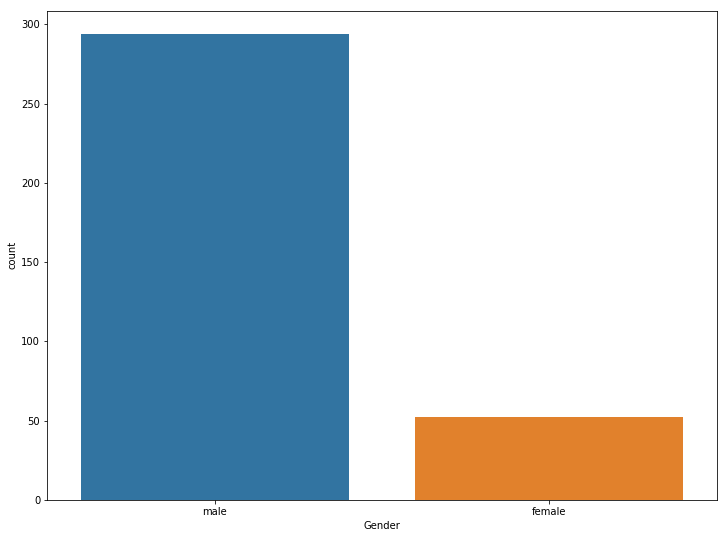

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
sns.countplot(x='Gender',data=df)
plt.show()

#### observations:



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> 3A). Create bins using columns Principal ,store it  to new variable name called bins? 

**Hint:** linspace(Principal.min(),Principal.max())

In [10]:
bins=np.linspace(df['Principal'].min(),df["Principal"].max())
bins


array([ 300.        ,  314.28571429,  328.57142857,  342.85714286,
        357.14285714,  371.42857143,  385.71428571,  400.        ,
        414.28571429,  428.57142857,  442.85714286,  457.14285714,
        471.42857143,  485.71428571,  500.        ,  514.28571429,
        528.57142857,  542.85714286,  557.14285714,  571.42857143,
        585.71428571,  600.        ,  614.28571429,  628.57142857,
        642.85714286,  657.14285714,  671.42857143,  685.71428571,
        700.        ,  714.28571429,  728.57142857,  742.85714286,
        757.14285714,  771.42857143,  785.71428571,  800.        ,
        814.28571429,  828.57142857,  842.85714286,  857.14285714,
        871.42857143,  885.71428571,  900.        ,  914.28571429,
        928.57142857,  942.85714286,  957.14285714,  971.42857143,
        985.71428571, 1000.        ])

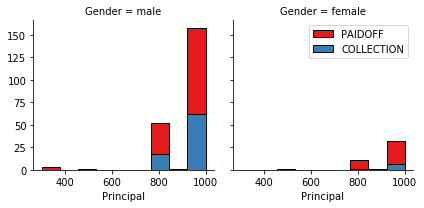

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">3.B) Plot columns  Gender Vs loan_status using histogram??


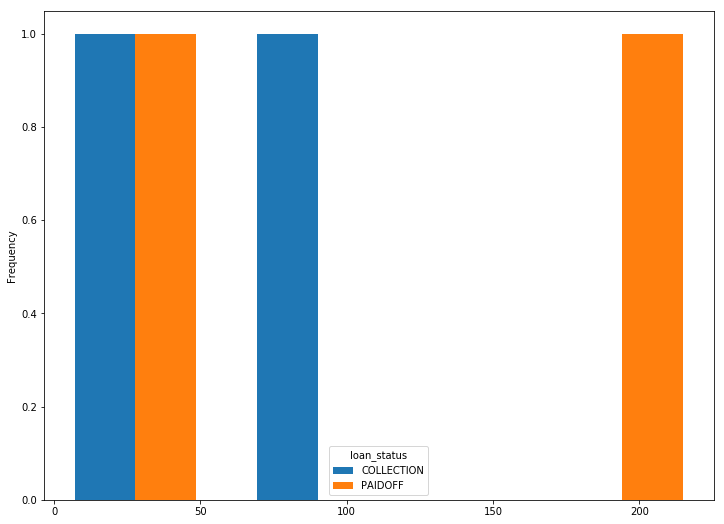

In [12]:
pd.crosstab(df["Gender"],df["loan_status"]).plot(kind='hist')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> 4. Create bins using columns age store it to new variable name called bins, and Plot gender vs loan_status using the newly created bins?

In [13]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [14]:
bins=np.linspace(df['age'].min(),df["age"].max())
bins

array([18.        , 18.67346939, 19.34693878, 20.02040816, 20.69387755,
       21.36734694, 22.04081633, 22.71428571, 23.3877551 , 24.06122449,
       24.73469388, 25.40816327, 26.08163265, 26.75510204, 27.42857143,
       28.10204082, 28.7755102 , 29.44897959, 30.12244898, 30.79591837,
       31.46938776, 32.14285714, 32.81632653, 33.48979592, 34.16326531,
       34.83673469, 35.51020408, 36.18367347, 36.85714286, 37.53061224,
       38.20408163, 38.87755102, 39.55102041, 40.2244898 , 40.89795918,
       41.57142857, 42.24489796, 42.91836735, 43.59183673, 44.26530612,
       44.93877551, 45.6122449 , 46.28571429, 46.95918367, 47.63265306,
       48.30612245, 48.97959184, 49.65306122, 50.32653061, 51.        ])

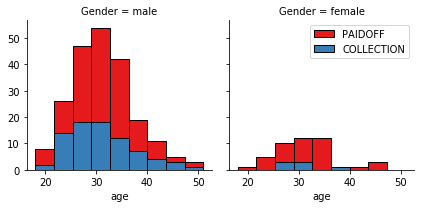

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

------

# 5 Questions X 3 Marks = 15 Marks

--------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">1. Create new column name called dayofweek, using dayofweek plot the histogram Gender Vs loan_status and create the bins separately?
    
 

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [17]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
bins

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        , 4.66666667, 5.33333333, 6.        ])

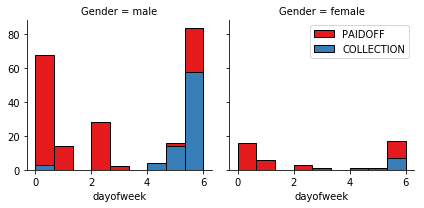

In [18]:
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">2.Create new column called Month and create bins using new column and plot a histogram. Look at the Months people get the loan and write your observations?

In [19]:
df['Month'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


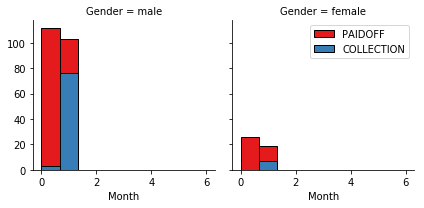

In [20]:
df['Month'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#### observations:
 
 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> 3.Create a new column Month and Dayofweek. Dayofweek shows people who get the loan at the end of the week don't pay it off, so using Feature binarization we set the  threshold values less then 4 and create a new column Weekend?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> 4.  Convert Categorical features to numerical values using One Hot Encoding?

In [21]:

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [22]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [24]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [25]:
Feature = df[['Principal','terms','age','Gender','Month']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Month,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">5.  Normalize Data and split the data into train = 70% and test size = 30%?

In [26]:

X = Feature
X[0:5]

,Principal,terms,age,Gender,Month,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [27]:
y =df["loan_status"]
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("X_train size is ", X_train.shape, "\n", "X_test size is ", X_test.shape, "\n",
      "y_train size is ", y_train.shape, "\n", "y_test size is ", y_test.shape)


X_train size is  (242, 8) 
 X_test size is  (104, 8) 
 y_train size is  (242,) 
 y_test size is  (104,)


In [29]:
print(X_train[0:5])
y_train[0:5]

     Principal  terms  age  Gender  Month  Bechalor  High School or Below  \
155        800     15   30       0      0         0                     1   
109       1000     15   26       0      1         0                     1   
187       1000     30   29       0      0         0                     1   
147        800     15   39       0      0         0                     1   
242        800     15   42       0      0         0                     1   

     college  
155        0  
109        0  
187        0  
147        0  
242        0  


155    PAIDOFF
109    PAIDOFF
187    PAIDOFF
147    PAIDOFF
242    PAIDOFF
Name: loan_status, dtype: object

--------

# 1 Questions X 7 Marks = 7 Marks

------------

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">1.A) Built a model for K Nearest Neighbor(KNN) and find the k value?(2 MARKS)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [31]:
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))


[[ 1 25]
 [ 4 74]]


In [32]:
print(classification_report(y_test,pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

  COLLECTION       0.20      0.04      0.06        26
     PAIDOFF       0.75      0.95      0.84        78

   micro avg       0.72      0.72      0.72       104
   macro avg       0.47      0.49      0.45       104
weighted avg       0.61      0.72      0.64       104

0.7211538461538461


In [33]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.7115384615384616
0.7211538461538461
0.7211538461538461


Test set Accuracy at k= 1 :  0.6153846153846154
Test set Accuracy at k= 2 :  0.5288461538461539
Test set Accuracy at k= 3 :  0.7115384615384616
Test set Accuracy at k= 4 :  0.6538461538461539
Test set Accuracy at k= 5 :  0.7115384615384616
Test set Accuracy at k= 6 :  0.7019230769230769
Test set Accuracy at k= 7 :  0.7211538461538461
Test set Accuracy at k= 8 :  0.7211538461538461
Test set Accuracy at k= 9 :  0.7211538461538461


Text(0, 0.5, 'Testing Accuracy')

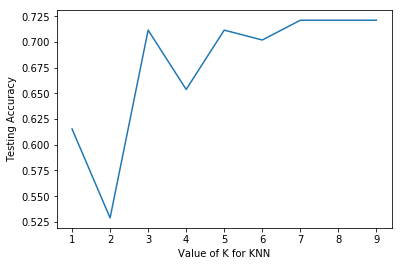

In [34]:

# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_similarity_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_similarity_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [35]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

[[ 1 25]
 [ 4 74]]


              precision    recall  f1-score   support

  COLLECTION       0.20      0.04      0.06        26
     PAIDOFF       0.75      0.95      0.84        78

   micro avg       0.72      0.72      0.72       104
   macro avg       0.47      0.49      0.45       104
weighted avg       0.61      0.72      0.64       104

0.7211538461538461


In [36]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

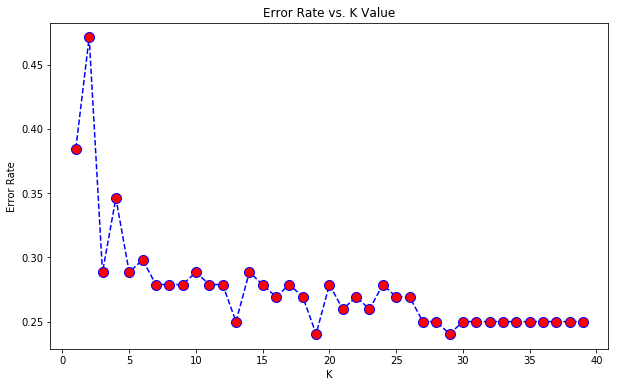

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">1.B) Built a model for Decision Tree?(3 MARKS)

In [38]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

#AFTER DEPTH 5 THE VALUE OF F1 SCORE AND JACARD IS CONSTANT SO WE WILL GIVE DEPTH OF 5


C:\Users\Megha Singhal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Depth,F1-score,Jacard
d=3,0.642857,0.750000
d=4,0.633333,0.730769
d=5,0.635714,0.673077


In [39]:

print(classification_report(y_test,pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

  COLLECTION       0.20      0.04      0.06        26
     PAIDOFF       0.75      0.95      0.84        78

   micro avg       0.72      0.72      0.72       104
   macro avg       0.47      0.49      0.45       104
weighted avg       0.61      0.72      0.64       104

0.7211538461538461


In [40]:
from sklearn.metrics import jaccard_similarity_score

# evaluate KNN
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_similarity_score(y_test, knn_yhat), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_similarity_score(y_test, dt_yhat), 2)

list_jc = [jc1, jc2]
list_jc

[0.72, 0.67]

In [41]:
# F1-score setup
from sklearn.metrics import f1_score


# evaluate KNN
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
list_fs = [fs1, fs2]
list_fs

[0.67, 0.64]

In [42]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = DT.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 3.03]

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;">1.D)  Create classification Reports for both models and  tell us  which model is better?(1 MARKS)

| Algorithm          | F1-score |  
|--------------------|----------|
| KNN                |     0.72 
| Decision Tree      |     0.64
